## We'll be using the contour plot to visualize descent on advertising dataset

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### Note - we will perform the gradient descent on the advertising data

In [20]:
data = pd.read_csv("Advertising.csv")

In [23]:
data = data.drop(columns=["Unnamed: 0"], axis=1)

In [24]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [25]:
Y = data["Sales"]

In [26]:
X = np.column_stack((data["TV"],data["Radio"]))

In [32]:
from sklearn.preprocessing import StandardScaler

In [35]:
# converting the values into normal form i.e., mean = 0 and S.D. = 1
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

[[ 0.96985227  0.98152247]
 [-1.19737623  1.08280781]
 [-1.51615499  1.52846331]
 [ 0.05204968  1.21785493]
 [ 0.3941822  -0.84161366]
 [-1.61540845  1.73103399]
 [-1.04557682  0.64390467]
 [-0.31343659 -0.24740632]
 [-1.61657614 -1.42906863]
 [ 0.61604287 -1.39530685]
 [-0.94515567 -1.17923146]
 [ 0.79002835  0.04969734]
 [-1.4390876   0.79920886]
 [-0.57850171 -1.05768905]
 [ 0.66625345  0.65065703]
 [ 0.56466461  1.65000572]
 [-0.92530498  0.9004942 ]
 [ 1.56887609  1.10306488]
 [-0.90895735 -0.18663512]
 [ 0.0030068   0.04294498]
 [ 0.8332328   0.29953451]
 [ 1.05509347 -1.22649795]
 [-1.5628625  -0.4972435 ]
 [ 0.94883389 -0.42971994]
 [-0.98952781 -0.72007125]
 [ 1.35285385 -1.33453565]
 [-0.04837147  0.40757221]
 [ 1.08662104 -0.44322465]
 [ 1.18820988  0.25902038]
 [-0.89260972 -0.49049114]
 [ 1.70316018  0.34004865]
 [-0.3986778  -0.39595816]
 [-0.58200477 -1.46958277]
 [ 1.38438142 -0.2203969 ]
 [-0.59952009 -1.47633512]
 [ 1.67747105 -1.29402151]
 [ 1.39956136  1.38666383]
 

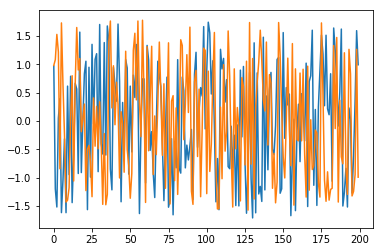

In [42]:
print(X_scaled)
plt.plot(X_scaled)

## Calculating Gradient and Mean Squared Error(MSE)

In [48]:
# def gradient_descent(W, x, y):
#     y_hyp = x.dot(W).flatten()
#     error = (y - y_hyp)
#     mse = (1.0 / len(x)) * np.sum(np.square(error))#this is just a single value answer not a multivalued matrix like gradient
#     gradient = -(1.0 / len(x)) * error.dot(x)
#     return gradient, mse
def gradient_descent(W, x, y):
    y_hat = x.dot(W).flatten()
    error = (y - y_hat)
    mse = (1.0 / len(x)) * np.sum(np.square(error))
    gradient = -(1.0 / len(x)) * error.dot(x)
    return gradient, mse

In [49]:
w = np.array((-40, -40))
alpha = 0.1
tolerance = 1e-3 # this thing is convergence tolerance

#creating two more arrays, one for storing all the intermediate w and mse
old_w = []
errors = []

In [52]:
# Perform Gradient Descent
iterations = 1
for i in range(200):
    gradient, error = gradient_descent(w, X_scaled, Y)
    new_w = w - alpha * gradient
 
    # Print error every 10 iterations
    if iterations % 10 == 0:
        print("Iteration: %d - Error: %.4f" % (iterations, error))
        old_w.append(new_w)
        errors.append(error)
 
    # Stopping Condition
    if np.sum(abs(new_w - w)) < tolerance:
        print('Gradient Descent has converged')
        break
 
    iterations += 1
    w = new_w
 

Iteration: 10 - Error: 732.6317
Iteration: 20 - Error: 256.7896
Iteration: 30 - Error: 205.5887
Iteration: 40 - Error: 200.0794
Iteration: 50 - Error: 199.4866
Iteration: 60 - Error: 199.4228
Iteration: 70 - Error: 199.4159
Iteration: 80 - Error: 199.4152
Gradient Descent has converged


In [53]:
all_ws = np.array(old_w)
levels = np.sort(np.array(errors))

In [69]:
all_ws

array([[-10.51166974, -11.22569704],
       [ -0.82382788,  -1.80240508],
       [  2.35956884,   1.28297487],
       [  3.40585928,   2.29294971],
       [  3.74983179,   2.62346716],
       [  3.86294645,   2.73159667],
       [  3.90015589,   2.76695908],
       [  3.91240045,   2.77851931]])

In [54]:
w0 = np.linspace(-w[0] * 5, w[0] * 5, 100)
w1 = np.linspace(-w[1] * 5, w[1] * 5, 100)
mse_vals = np.zeros(shape=(w0.size, w1.size))

In [59]:
for i, value1 in enumerate(w0):
    for j, value2 in enumerate(w1):
        w_temp = np.array((value1,value2))        
        mse_vals[i, j] = gradient_descent(w_temp, X_scaled, Y)[1]

print(mse_vals)


[[1072.2758123  1062.26391592 1052.40968552 ...  835.21465277
   840.49635616  845.93572553]
 [1053.14023153 1043.14050189 1033.29843823 ...  817.25924571
   822.55311584  828.00465195]
 [1034.31719534 1024.32963245 1014.49973553 ...  799.61638324
   804.92242011  810.38612296]
 ...
 [ 671.33206555  662.50034288  653.8262862  ...  548.74775606
   555.20963316  561.82917624]
 [ 682.51330952  673.6937536   665.03186365 ...  561.10917374
   567.58321759  574.21492741]
 [ 694.00709809  685.1997089   676.54998569 ...  573.78313602
   580.2693466   586.91322316]]


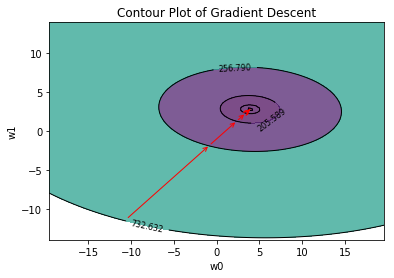

In [68]:
# Call the plt.annotate() function in loops to create the arrow which shows the convergence path of the gradient descent
plt.contourf(w0, w1, mse_vals, levels,alpha=0.7)

for i in range(len(old_w) - 1):
    plt.annotate('', xy=all_ws[i + 1, :], xytext=all_ws[i, :],# the start and the end points of the arrows pointing towards the centre
                 arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                 va='center', ha='center')
 
CS = plt.contour(w0, w1, mse_vals, levels, linewidths=1,colors='black')
plt.clabel(CS, inline=1, fontsize=8)
plt.title("Contour Plot of Gradient Descent")
plt.xlabel("w0")
plt.ylabel("w1")
plt.show()